In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('dados/api_horaria.csv', sep = ';')
dados.head()

,DAT_MED,HR_MED,TEM_INS,UMD_INS,VEN_VEL
0,2012-01-01,0,26.6,81.0,1.1
1,2012-01-01,100,26.3,81.0,0.8
2,2012-01-01,200,26.2,82.0,0.7
3,2012-01-01,300,26.0,83.0,0.2
4,2012-01-01,400,25.6,85.0,0.7


# Tratando algumas coisas

In [3]:
dados.columns = ['data','hora','temperatura','umidade','vento']

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85356 entries, 0 to 85355
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         85356 non-null  object 
 1   hora         85356 non-null  int64  
 2   temperatura  85356 non-null  float64
 3   umidade      85356 non-null  float64
 4   vento        85356 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ MB


In [5]:
dados.head(10)

,data,hora,temperatura,umidade,vento
0,2012-01-01,0,26.6,81.0,1.1
1,2012-01-01,100,26.3,81.0,0.8
2,2012-01-01,200,26.2,82.0,0.7
3,2012-01-01,300,26.0,83.0,0.2
4,2012-01-01,400,25.6,85.0,0.7
5,2012-01-01,500,25.2,87.0,0.1
6,2012-01-01,600,25.0,88.0,0.4
7,2012-01-01,700,24.8,89.0,0.3
8,2012-01-01,800,24.2,90.0,0.0
9,2012-01-01,900,24.2,91.0,0.1


In [6]:
dia = []

for i in dados['data']:
    strg1 = str(i)
    dia.append(strg1[5:10])
    
data_dia = pd.DataFrame(dia)


In [7]:
data_dia.columns = ['index']

In [8]:
data_dia

,index
0,01-01
1,01-01
2,01-01
3,01-01
4,01-01
...,...
85351,10-31
85352,10-31
85353,10-31
85354,10-31


In [9]:
#data_md = data_md.astype(int)

In [10]:
#data_md.info()

In [11]:
dados = pd.concat([dados,data_dia], axis = 1)
dados

,data,hora,temperatura,umidade,vento,index
0,2012-01-01,0,26.6,81.0,1.1,01-01
1,2012-01-01,100,26.3,81.0,0.8,01-01
2,2012-01-01,200,26.2,82.0,0.7,01-01
3,2012-01-01,300,26.0,83.0,0.2,01-01
4,2012-01-01,400,25.6,85.0,0.7,01-01
...,...,...,...,...,...,...
85351,2021-10-31,1900,29.4,69.0,2.7,10-31
85352,2021-10-31,2000,28.5,75.0,0.6,10-31
85353,2021-10-31,2100,27.3,80.0,0.3,10-31
85354,2021-10-31,2200,26.9,82.0,0.0,10-31


In [12]:
dados.index = dados['index']

# Estatísticas

In [13]:
dados.head(5)

,data,hora,temperatura,umidade,vento,index
index,,,,,,
01-01,2012-01-01,0,26.6,81.0,1.1,01-01
01-01,2012-01-01,100,26.3,81.0,0.8,01-01
01-01,2012-01-01,200,26.2,82.0,0.7,01-01
01-01,2012-01-01,300,26.0,83.0,0.2,01-01
01-01,2012-01-01,400,25.6,85.0,0.7,01-01


In [14]:
dados.describe()
#dados razoavelmente aceitas

,hora,temperatura,umidade,vento
count,85356.000000,85356.000000,85356.000000,85356.000000
mean,1145.075917,26.772835,80.924473,0.720127
std,692.875452,2.859451,12.687633,0.711100
min,0.000000,18.200000,40.000000,0.000000
25%,500.000000,24.400000,71.000000,0.100000
50%,1100.000000,25.800000,85.000000,0.500000
75%,1700.000000,29.100000,92.000000,1.200000
max,2300.000000,36.100000,100.000000,2.800000


In [15]:
dados.drop(columns = 'data', inplace = True)

In [16]:
dados.drop(columns = 'index', inplace = True)

In [17]:
dados.head(30)

,hora,temperatura,umidade,vento
index,,,,
01-01,0,26.6,81.0,1.1
01-01,100,26.3,81.0,0.8
01-01,200,26.2,82.0,0.7
01-01,300,26.0,83.0,0.2
01-01,400,25.6,85.0,0.7
01-01,500,25.2,87.0,0.1
01-01,600,25.0,88.0,0.4
01-01,700,24.8,89.0,0.3
01-01,800,24.2,90.0,0.0


In [18]:
dados.corr()

,hora,temperatura,umidade,vento
hora,1.000000,0.502784,-0.455962,0.459993
temperatura,0.502784,1.000000,-0.947185,0.698533
umidade,-0.455962,-0.947185,1.000000,-0.691961
vento,0.459993,0.698533,-0.691961,1.000000


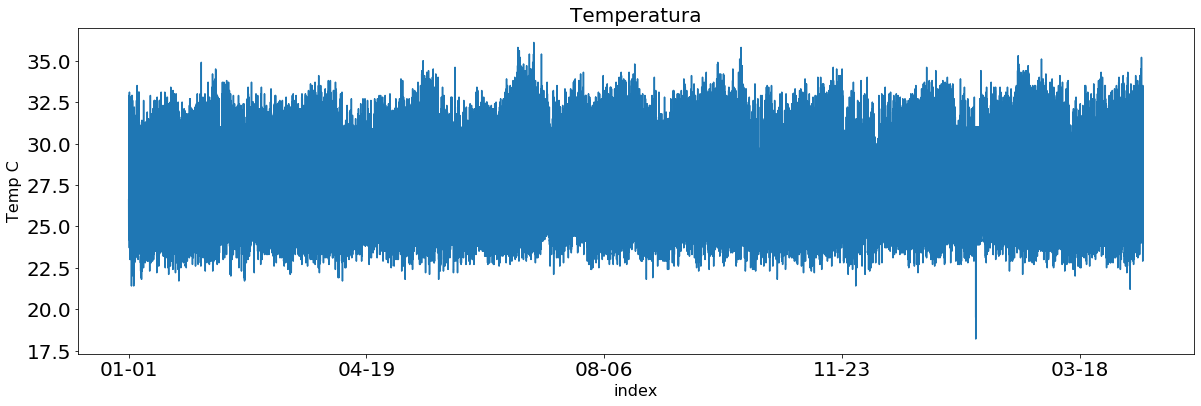

In [19]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Temperatura', fontsize=20)
ax.set_ylabel('Temp C', fontsize=16)
ax.set_xlabel('tempo', fontsize=16)
ax = dados['temperatura'].plot(fontsize=20)

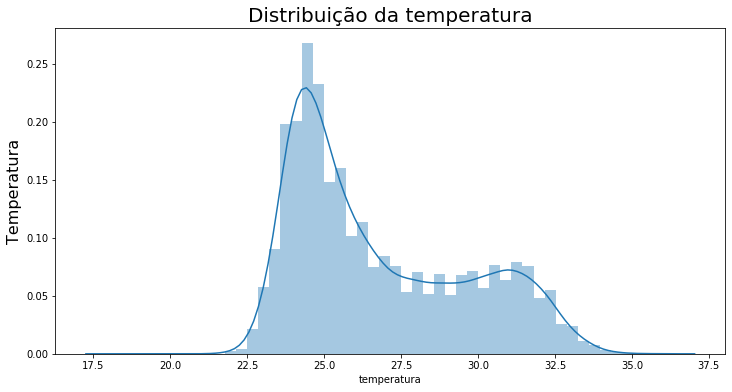

In [20]:
ax = sns.distplot(dados['temperatura'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da temperatura', fontsize=20)
ax.set_ylabel('Temperatura', fontsize=16)
ax

# Regressao linear em si

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [22]:
#variavel dependente
y = dados['temperatura']

#variaveis explicativas
X = dados[['hora','umidade','vento']]

In [23]:
#criando os datasets de treino e de teste
#30% dos dados vão ser para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=140)

In [24]:
X_train.shape

(59749, 3)

In [25]:
X_test.shape
X_test

,hora,umidade,vento
index,,,
09-07,2000,60.0,0.6
06-23,400,85.0,0.6
02-18,1000,94.0,0.0
01-11,1000,89.0,0.2
04-05,2000,92.0,0.9
...,...,...,...
06-25,200,93.0,0.0
01-22,1700,55.0,1.0
09-21,200,77.0,1.2


In [26]:
y_train.shape

(59749,)

In [27]:
y_test.shape

(25607,)

In [28]:
model =  LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#quais saõ as previsões com o X_test -> isso é feito para depois comparar os dados certos(y_test) com as previsões
#obtidas e assim julgar a previsão
previsao = model.predict(X_test)

In [43]:
df_previsao = pd.DataFrame(previsao)

In [44]:
df_test= pd.DataFrame(y_test)

In [45]:
df_previsao.index = df_test.index

In [46]:
df_previsao.columns = ['previsao']
df_previsao

,previsao
index,
09-07,31.114666
06-23,25.703028
02-18,23.983888
01-11,25.013156
04-05,24.925937
...,...
06-25,23.920866
01-22,32.097345
09-21,27.355797


# Métricas

In [48]:
#COMPARAÇÃO DA PREVISÃO COM OS DADOS CERTOS
'''Since you are doing a classification task, you should be using the metric R-squared 
(co-effecient of determination) instead of accuracy score (accuracy score is used for classification problems).
R-squared can be computed by calling score function provided by'''

print('R² = %s' % metrics.r2_score(y_test,previsao))

R² = 0.9038080618769984


In [36]:
#não deve ser usada nesses casos

#accuracy_score(y_test, previsao, normalize = False)

# Previsão pontual

In [37]:
X_test[0:1]

,hora,umidade,vento
index,,,
09-07,2000,60.0,0.6


In [38]:
entrada = X_test[0:1]

In [39]:
temp_prev = model.predict(entrada)[0].round(2)
print("temperatura prevista para a entrada dada: ", temp_prev)

temperatura prevista para a entrada dada:  31.11


# "Previsão no dia"

In [40]:
tabela_comparativa =  pd.concat([df_test,df_previsao], axis = 1)
tabela_comparativa.columns = ['y_test','previsao']
tabela_comparativa.head(40)

,y_test,previsao
index,,
09-07,29.1,31.114666
06-23,24.4,25.703028
02-18,24.3,23.983888
01-11,25.5,25.013156
04-05,25.3,24.925937
12-26,27.5,26.376890
05-30,31.3,29.352801
10-19,32.4,31.919688
12-11,31.4,30.537296


In [41]:
dia242 = tabela_comparativa.loc['04-02','previsao']
dia242 = pd.DataFrame(dia242)

In [63]:
dia242.head(24)

,previsao
index,
04-02,23.983888
04-02,23.268882
04-02,26.741197
04-02,27.066153
04-02,25.015954
04-02,30.933753
04-02,24.210324
04-02,23.904950
04-02,27.355704


# Resíduo

In [65]:
y_previsto_train = model.predict(X_train)

In [66]:
residuo = y_train - y_previsto_train

/home/rodrigo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Temperatura', ylabel='Density'>

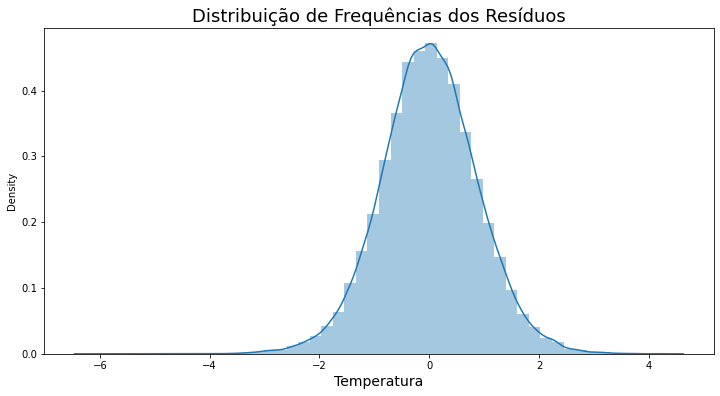

In [68]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Temperatura', fontsize=14)
ax